<a href="https://colab.research.google.com/github/girlwcode/21-1_machineLearning/blob/main/Crossvalid_with_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# 교차 검증을 이용한 옵티마이저 선택
# Load Module
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad, RMSprop
from sklearn.model_selection import KFold

In [26]:
# Load & Transform Dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [28]:
# Set HyperParameter
n_input = 784

# hidden layer = 5
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_hidden5 = 512

n_output = 10

batch_size = 512
n_epoch = 40
k = 5

In [31]:
import time
# Build Model
def build_model() :
  model = Sequential()
  model.add(Dense(units=n_hidden1,activation='relu', input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2, activation='relu'))
  model.add(Dense(units=n_hidden3, activation='relu'))
  model.add(Dense(units=n_hidden4, activation='relu'))
  model.add(Dense(units=n_hidden5, activation='relu'))
  model.add(Dense(units=n_output, activation='softmax'))
  return model

# Cross Validation Def
def cross_validation(opt):
  start = time.time() # 시작 시간
  accuracy=[]

  for train_index,val_index in KFold(k).split(x_train):
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
    dmlp = build_model()
    dmlp.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=0)
    accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])

  end = time.time() # 종료 시간
  print('하이퍼 매개변수 최적화에 걸린 시간은',end-start,'초입니다')

  return accuracy

In [32]:
# 옵티마니저 4개에 대해 교차 검증 실행
print('*** SGD 옵티마이저 사용 ***')
acc_sgd = cross_validation(SGD())
print('*** Adam 옵티마이저 사용 ***')
acc_adam = cross_validation(Adam())
print('*** Adagrad 옵티마이저 사용 ***')
acc_adagrad = cross_validation(Adagrad())
print('*** RMSprop 옵티마이저 사용 ***')
acc_rmsprop = cross_validation(RMSprop())

# 옵티마이저 4개의 정확률 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop",np.array(acc_rmsprop).mean())

*** SGD 옵티마이저 사용 ***
하이퍼 매개변수 최적화에 걸린 시간은 174.38900637626648 초입니다
*** Adam 옵티마이저 사용 ***
하이퍼 매개변수 최적화에 걸린 시간은 179.84147119522095 초입니다
*** Adagrad 옵티마이저 사용 ***
하이퍼 매개변수 최적화에 걸린 시간은 163.06141424179077 초입니다
*** RMSprop 옵티마이저 사용 ***
하이퍼 매개변수 최적화에 걸린 시간은 193.0696783065796 초입니다
SGD: 0.8622000098228455
Adam: 0.894866669178009
Adagrad: 0.8343499898910522
RMSprop 0.8929166793823242


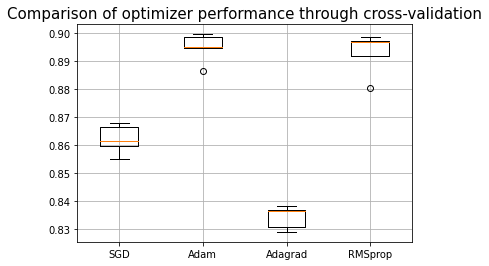

In [33]:
import matplotlib.pyplot as plt

# 옵티마이저의 정확률을 박스 플롯으로 비교
plt.title('Comparison of optimizer performance through cross-validation', fontsize=15)
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=['SGD','Adam','Adagrad', 'RMSprop'])
plt.grid()